# Clasificación Binaria

## Clasificación por nivel de experiencia

### 1. La variable 'experience_level' clasifica a los empleados en:
   
- EN: Entry-level (nivel de entrada)
- MI: Mid-level (nivel medio)
- SE: Seniorv (mas que medio)
- EX: Executive (alta dirección)

### 2. Clasificación binaria:

Grupo 0: EN y MI → poca o mediana experiencia
Grupo 1: SE y EX → mucha experiencia

### 3. ¿Para qué sirve?
   
Este modelo permite predecir si un perfil es de alta experiencia, basándose en variables como:
- employment_type (tipo de contrato)
- job_title o job_group (tipo de cargo)
- company_size (tamaño de empresa)
- remote_ratio o is_remote (nivel de trabajo remoto)
- company_location y employee_residence (ubicación)
- salary_in_usd 
  
### 4. Aplicación real:
- Sistemas de recomendación de empleo
- Clasificación automática de candidatos por experiencia


### importar librerias

In [441]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt


### abrir data

In [281]:
path= r"C:\Users\darly\OneDrive\Escritorio\materialClaseIA\dataSets\dataSalarios"
df = pd.read_csv(path + r"\ds_salaries.csv")  # ruta al archivo original

In [283]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [285]:
df.shape

(607, 12)

### preprocesamiento de la data

#### 2. Eliminar columnas innecesarias

In [289]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [291]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [293]:
df.shape

(607, 11)

In [295]:
#vamos a eliminar otras variables que no aportan al estudio, dado que ya existe una columna que
#llama salary_in_usd y esta aporta mas contexto y uniformidad que las demas
df.drop(columns=['salary_currency','salary'], inplace=True)

In [297]:
df.shape

(607, 9)

In [299]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

#### 3. Transformar variables categóricas

#### 🧠 ¿Qué es astype('category')?
Es un método de pandas que convierte una columna de tipo object (texto) o numérico en un tipo especial llamado Categorical.

#### ✅ ¿Para qué sirve?
1. Ahorra memoria
En vez de guardar cada string, guarda un número entero que representa la categoría.

2. Orden lógico o jerárquico (opcional)
Puedes definir un orden entre categorías si lo necesitas (por ejemplo: Junior < Mid < Senior < Exec).

3. Facilita el preprocesamiento para Machine Learning
Muchos modelos no aceptan strings como entrada, y este paso permite aplicar transformaciones como: 
LabelEncoder, OneHotEncoder, Convertir fácilmente a variables dummies con pd.get_dummies()

4. Mejora operaciones como groupby, sort, filter
Operaciones sobre datos categóricos son más rápidas y eficientes que sobre objetos de texto.

In [303]:
df['experience_level']

0      MI
1      SE
2      SE
3      MI
4      SE
       ..
602    SE
603    SE
604    SE
605    SE
606    MI
Name: experience_level, Length: 607, dtype: object

In [305]:
df['experience_level'] = df['experience_level'].astype('category')

In [307]:
df['experience_level']

0      MI
1      SE
2      SE
3      MI
4      SE
       ..
602    SE
603    SE
604    SE
605    SE
606    MI
Name: experience_level, Length: 607, dtype: category
Categories (4, object): ['EN', 'EX', 'MI', 'SE']

In [309]:
# Transformar resto de variables cualitativas a categóricas 

df['employment_type'] = df['employment_type'].astype('category')
df['job_title'] = df['job_title'].astype('category')
df['employee_residence'] = df['employee_residence'].astype('category')
df['company_location'] = df['company_location'].astype('category')
df['company_size'] = df['company_size'].astype('category')

#### 4. Crear nuevas variables para clasificación 
que sean categoricas pero en números, si son dos aplico binario, si es más de dos aplico label

In [312]:
 # Variable binaria: experiencia alta (1) vs baja (0)
df['high_experience'] = df['experience_level'].apply(lambda x: 1 if x in ['SE', 'EX'] else 0)

# Variable binaria: trabajo remoto (1 si >= 50% remoto)
df['is_remote'] = df['remote_ratio'].apply(lambda x: 1 if x >= 50 else 0)


In [314]:
df.shape

(607, 11)

In [316]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'high_experience', 'is_remote'],
      dtype='object')

Este bloque de código recorre una lista de columnas categóricas y les aplica codificación numérica usando LabelEncoder de Scikit-learn. Primero, se crea un diccionario vacío llamado le_dict que servirá para almacenar los codificadores utilizados en cada columna. Luego, para cada columna en la lista ['employment_type', 'job_group', 'company_size', 'company_location', 'employee_residence'], se crea una instancia del codificador (LabelEncoder()), se ajusta y transforma la columna con fit_transform, lo cual convierte los valores categóricos (como texto) en valores numéricos enteros, y finalmente se guarda ese codificador en el diccionario le_dict para poder revertir la codificación más adelante si es necesario. Nota: es importante corregir la última línea como le_dict[col] = encode para que almacene correctamente el codificador.

In [319]:
# Codificar variables categóricas
le_dict = {}
for col in ['employment_type', 'company_size', 'company_location', 'employee_residence']:
    encode = LabelEncoder()
    df[col] = encode.fit_transform(df[col])
    le_dict[col] = encode

In [321]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,high_experience,is_remote
0,2020,MI,2,Data Scientist,79833,14,0,12,0,0,0
1,2020,SE,2,Machine Learning Scientist,260000,32,0,29,2,1,0
2,2020,SE,2,Big Data Engineer,109024,20,50,18,1,1,1
3,2020,MI,2,Product Data Analyst,20000,23,0,20,2,0,0
4,2020,SE,2,Machine Learning Engineer,150000,55,50,48,0,1,1


In [323]:
df.shape

(607, 11)

In [325]:
# eliminar columnas que ya se codificaron
df.drop(columns=['experience_level','remote_ratio'], inplace=True)

In [327]:
df.shape

(607, 9)

### Aplicar modelos de clasificacioón Binaria

#### 5. dividir set de datos para X y y

In [331]:
features = ['employment_type', 'company_size', 'company_location',
            'employee_residence', 'is_remote', 'work_year']
X = df[features]
y_bin = df['high_experience']

#### 6. data de entrenamiento y testing

In [334]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

#### 7. Aplicar modelos

In [337]:
# Modelos binarios
logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
logreg.fit(X_train_bin, y_train_bin)
knn.fit(X_train_bin, y_train_bin)

KNeighborsClassifier()

#### 8. Evaluar modelos

In [340]:
# Evaluación
print("\nRegresión Logística (binaria):")
print(classification_report(y_test_bin, logreg.predict(X_test_bin)))
print("\nKNN (binaria):")
print(classification_report(y_test_bin, knn.predict(X_test_bin)))



Regresión Logística (binaria):
              precision    recall  f1-score   support

           0       0.65      0.51      0.57        63
           1       0.58      0.71      0.64        59

    accuracy                           0.61       122
   macro avg       0.61      0.61      0.60       122
weighted avg       0.62      0.61      0.60       122


KNN (binaria):
              precision    recall  f1-score   support

           0       0.70      0.79      0.75        63
           1       0.75      0.64      0.69        59

    accuracy                           0.72       122
   macro avg       0.72      0.72      0.72       122
weighted avg       0.72      0.72      0.72       122



#### 9. Mejorar modelos 
Para mejorar el modelo a continuación se transforma  y agrega una nueva variable al set de datos de características

##### Función group_job(title):

1. Recibe como argumento un nombre de cargo (job_title).

2. Convierte el texto a minúsculas para evitar problemas con mayúsculas o minúsculas.

3. Usa una serie de condicionales if-elif para agrupar cargos similares en categorías generales:

4. Si el título contiene la palabra "scientist", lo clasifica como "scientist".

5. Si contiene "engineer", lo agrupa como "engineer".

6. Y así con "analyst", "manager", y "architect".

7. Si no contiene ninguno de esos términos, lo etiqueta como "other".

##### Aplicación sobre el DataFrame:

1. df['job_title'].apply(group_job) aplica esta función a cada fila de la columna job_title.

2. El resultado se guarda en una nueva columna llamada job_group.

In [344]:

# Variable agrupada: grupo del cargo
def group_job(title):
    title = title.lower()
    if "scientist" in title:
        return "scientist"
    elif "engineer" in title:
        return "engineer"
    elif "analyst" in title:
        return "analyst"
    elif "manager" in title:
        return "manager"
    elif "architect" in title:
        return "architect"
    else:
        return "other"
# llenar columna job_group
df['job_group'] = df['job_title'].apply(group_job)

In [346]:
#de nuevo el diccionario y el data frame con la nueva columna
le_dict = {}
for col in ['employment_type', 'job_group', 'company_size', 'company_location', 'employee_residence']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le



In [348]:
#eliminar columna que no requerimos ya
df.drop(columns=['job_title'], inplace=True)

In [350]:
df.columns, df.shape

(Index(['work_year', 'employment_type', 'salary_in_usd', 'employee_residence',
        'company_location', 'company_size', 'high_experience', 'is_remote',
        'job_group'],
       dtype='object'),
 (607, 9))

In [382]:
# Selección de features para X, y ya esta
 
X2 = df.drop(columns=['high_experience'])

y2 = y_bin
X2

,work_year,employment_type,salary_in_usd,employee_residence,company_location,company_size,is_remote,job_group
0,2020,2,79833,14,12,0,0,5
1,2020,2,260000,32,29,2,0,5
2,2020,2,109024,20,18,1,1,2
3,2020,2,20000,23,20,2,0,0
4,2020,2,150000,55,48,0,1,2
...,...,...,...,...,...,...,...,...
602,2022,2,154000,55,48,1,1,2
603,2022,2,126000,55,48,1,1,2
604,2022,2,129000,55,48,1,0,0
605,2022,2,150000,55,48,1,1,0


In [392]:
#partir data
X_train_bin2, X_test_bin2, y_train_bin2, y_test_bin2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

#aplicar modelos 

logreg2 = LogisticRegression(max_iter=1000)
knn2 = KNeighborsClassifier()
logreg2.fit(X_train_bin2, y_train_bin2)
knn2.fit(X_train_bin2, y_train_bin2)



KNeighborsClassifier()

In [394]:

# Evaluación
print("\nRegresión Logística (binaria):")
print(classification_report(y_test_bin2, logreg2.predict(X_test_bin2)))
print("\nKNN (binaria):")
print(classification_report(y_test_bin2, knn2.predict(X_test_bin2)))


Regresión Logística (binaria):
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        63
           1       0.69      0.71      0.70        59

    accuracy                           0.70       122
   macro avg       0.70      0.71      0.70       122
weighted avg       0.71      0.70      0.70       122


KNN (binaria):
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        63
           1       0.67      0.71      0.69        59

    accuracy                           0.69       122
   macro avg       0.69      0.69      0.69       122
weighted avg       0.69      0.69      0.69       122



### guardar data de la clasificacion
Esta data tiene como objetivo ser la entrada para una clasificacion Binaria del nivel de experiencia

In [275]:
df.to_csv(path + r"\clasificacionBin.csv", index=False)  # index=False evita guardar los índices

### comparar modelos

In [428]:


# Paso 1: Obtener los reportes como diccionarios
reporte_log1 = classification_report(y_test_bin, logreg.predict(X_test_bin), output_dict=True)
reporte_knn1 = classification_report(y_test_bin, knn.predict(X_test_bin), output_dict=True)
reporte_log2 = classification_report(y_test_bin2, logreg2.predict(X_test_bin2), output_dict=True)
reporte_knn2 = classification_report(y_test_bin2, knn2.predict(X_test_bin2), output_dict=True)


# Paso 2: Convertir los diccionarios en DataFrames
df_log1 = pd.DataFrame(reporte_log1).T
df_knn1 = pd.DataFrame(reporte_knn1).T
df_log2 = pd.DataFrame(reporte_log2).T
df_knn2 = pd.DataFrame(reporte_knn2).T

# Paso 3: Renombrar columnas para distinguir modelos
df_log1.columns = [f'LogReg()_{col}' for col in df_log1.columns]
df_knn1.columns = [f'KNN()_{col}' for col in df_knn1.columns]
df_log2.columns = [f'LogReg(Cjys)_{col}' for col in df_log2.columns]
df_knn2.columns = [f'KNN(Cjys)_{col}' for col in df_knn2.columns]

# Paso 4: Unir ambos resultados en una sola tabla
df_comparacion = pd.concat([df_log1, df_knn1, df_log2, df_knn2], axis=1)

# Paso 5: Mostrar el DataFrame
df_comparacion.round(2)


,LogReg()_precision,LogReg()_recall,LogReg()_f1-score,LogReg()_support,KNN()_precision,KNN()_recall,KNN()_f1-score,KNN()_support,LogReg(Cjys)_precision,LogReg(Cjys)_recall,LogReg(Cjys)_f1-score,LogReg(Cjys)_support,KNN(Cjys)_precision,KNN(Cjys)_recall,KNN(Cjys)_f1-score,KNN(Cjys)_support
0,0.65,0.51,0.57,63.00,0.70,0.79,0.75,63.00,0.72,0.70,0.71,63.0,0.71,0.67,0.69,63.00
1,0.58,0.71,0.64,59.00,0.75,0.64,0.69,59.00,0.69,0.71,0.70,59.0,0.67,0.71,0.69,59.00
accuracy,0.61,0.61,0.61,0.61,0.72,0.72,0.72,0.72,0.70,0.70,0.70,0.7,0.69,0.69,0.69,0.69
macro avg,0.61,0.61,0.60,122.00,0.72,0.72,0.72,122.00,0.70,0.71,0.70,122.0,0.69,0.69,0.69,122.00
weighted avg,0.62,0.61,0.60,122.00,0.72,0.72,0.72,122.00,0.71,0.70,0.70,122.0,0.69,0.69,0.69,122.00


### guardar modelos

In [434]:
joblib.dump(logreg2, r'C:\Users\darly\OneDrive\Escritorio\materialClaseIA\modelos\logreg2.pkl') 
joblib.dump(knn, r'C:\Users\darly\OneDrive\Escritorio\materialClaseIA\modelos\knn1.pkl')

['C:\\Users\\darly\\OneDrive\\Escritorio\\materialClaseIA\\modelos\\knn1.pkl']

### Graficar predicciones
Vamos a graficar a partir de la matriz de confusión

#### Matriz de confunsión
Una forma excelente de visualizar si un modelo clasificó bien o no es con la matriz de confusión. Es una tabla que muestra cuántos aciertos y errores tuvo el modelo para cada clase.

Supón que estás clasificando si alguien tiene experiencia alta (1) o no (0). Al final, obtienes algo como esto:

                    |Predicho: 0| Predicho: 1|
    Real: 0 (baja)  |   	 50 | 10         |
    Real: 1 (alta)	|        5  | 57         |

    Los valores en la diagonal son los aciertos (predijo bien).
    Los otros valores son errores.

In [470]:
modelos = [logreg, knn, logreg2, knn2]

MODELO 0


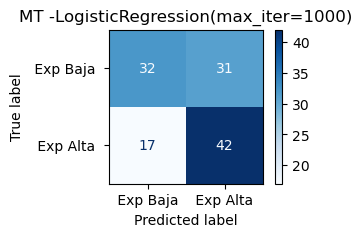

MODELO 1


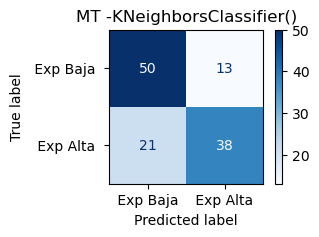

MODELO 2


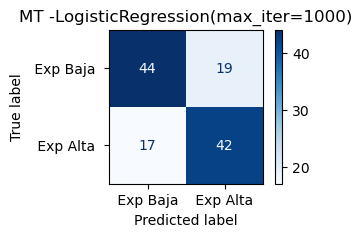

MODELO 3


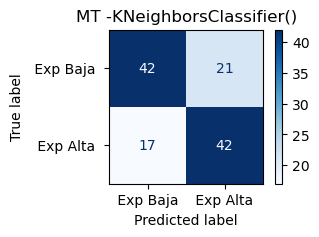

In [504]:

for i in range(len(modelos)):
    if (i > 1):
        y_pred= modelos[i].predict(X_test_bin2)
        cm = confusion_matrix(y_test_bin2, y_pred)
    else:
        y_pred= modelos[i].predict(X_test_bin)
        cm = confusion_matrix(y_test_bin, y_pred)
    print("MODELO " + str(i))
     
     # Crear figura y ajustar tamaño
    fig, ax = plt.subplots(figsize=(3, 2))

    # Mostrar el gráfico con etiquetas personalizadas

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[" Exp Baja ", " Exp Alta "])
    disp.plot(cmap="Blues", ax=ax) 

    plt.title("MT -" + str(modelos[i]))
    plt.show()


    
        
        

In [516]:
sum(df["high_experience"]==1), sum(df["high_experience"]==0)

(306, 301)